<h2>HEALTH SECTOR PROJECT</h2>

<h2>Analysis on the health sectors on the number of patiences highly affected on specific diseases</h2>

<h2><b>1.0-Business Understanding </b></h2>

<h3>Identifying the number of patients mostly affected by a specific disease.<br> <br>The number of maternal mortalities and the kind of vaccines used on the patient. <br> <br>The age bracket is highly affected by a specific disease and there mortality rate.<br><br>The localities highly affected by a certain disease over a given period </h3>

<h3><b>1.1 Project objectives</b></h3>

<h4>Reduce malaria incidence by 30% in children under 5 in Region X through bed-net distribution and community awareness campaigns <br><br> Increase HIV testing coverage from 50% to 80% among high-risk populations in Urban Y by 2025 via mobile clinics and targeted outreach<br><br>
</h4>

<h2>2-Data Understanding</h2>

<h3>2.1Python libraries Importation</h3>

In [1]:
#begin by importing necessary data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h2>2.2 opening the file using pandas libriary</h2>

In [2]:
health=pd.read_csv("data.csv",encoding="latin-1",low_memory=False)


<h2>2.3- open the first 5 elements</h2>

In [3]:
health.tail(10)

,countries,year,"Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(male)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(female)",Unnamed: 5,Unnamed: 6,Unnamed: 7
3651,Zimbabwe,2008.0,32.1,32.4,32.0,NaN,NaN,NaN
3652,Zimbabwe,2007.0,29.7,30.1,29.5,NaN,NaN,NaN
3653,Zimbabwe,2006.0,27.0,26.5,27.5,NaN,NaN,NaN
3654,Zimbabwe,2005.0,25.8,26.3,25.4,NaN,NaN,NaN
3655,Zimbabwe,2004.0,24.5,24.6,24.5,NaN,NaN,NaN
3656,Zimbabwe,2003.0,23.1,23.5,22.7,NaN,NaN,NaN
3657,Zimbabwe,2002.0,22.7,24.1,21.5,NaN,NaN,NaN
3658,Zimbabwe,2001.0,21.7,23.6,20.2,NaN,NaN,NaN
3659,Zimbabwe,2000.0,21.4,23.3,19.8,NaN,NaN,NaN
3660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>2.4-check the data types</h3>

In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 8 columns):
 #   Column                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                 --------------  -----  
 0   countries                                                                                                                                              3660 non-null   object 
 1   year                                                                                                                                                   3660 non-null   float64
 2   Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)    3660 non-null   fl

<h3>2.4-shape</h3>

In [5]:
health.shape

(3661, 8)

<h3>2.5 renaming columns</h3>

In [6]:
#Use inplace=True if you want to modify the original DataFrame, or inplace=False
health.rename(columns={"Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(male)":"Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)":"Pr(30-70 NCD Mortality | All)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(female)":"Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)"},inplace=True)


<h3>2.6 -dropping columns </h3>

In [7]:
health.drop(columns=["Unnamed: 5","Unnamed: 6","Unnamed: 7"],inplace=True)

<h3>2.7-Checking the Data information</h3>

In [8]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 5 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   countries                                         3660 non-null   object 
 1   year                                              3660 non-null   float64
 2   Pr(30-70 NCD Mortality | All)                     3660 non-null   float64
 3   Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)    3660 non-null   float64
 4   Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)  3660 non-null   float64
dtypes: float64(4), object(1)
memory usage: 143.1+ KB


<h3>2.8-working out the missing values in the Data set</h3>

In [9]:
health.isnull().sum()

countries                                           1
year                                                1
Pr(30-70 NCD Mortality | All)                       1
Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)      1
Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)    1
dtype: int64

<h3>2.9-Drop the empty row index</h3>

In [10]:
health.drop([3660],axis=0,inplace=True)

In [11]:
health.tail()

,countries,year,Pr(30-70 NCD Mortality | All),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)
3655,Zimbabwe,2004.0,24.5,24.6,24.5
3656,Zimbabwe,2003.0,23.1,23.5,22.7
3657,Zimbabwe,2002.0,22.7,24.1,21.5
3658,Zimbabwe,2001.0,21.7,23.6,20.2
3659,Zimbabwe,2000.0,21.4,23.3,19.8


<h3>3.0-convert year to integer</h3>

In [12]:
health["year"]=health["year"].astype(int)

In [13]:
health["year"].head()

0    2019
1    2018
2    2017
3    2016
4    2015
Name: year, dtype: int32

In [14]:
#checking out the missing values
health.isna().sum()

countries                                           0
year                                                0
Pr(30-70 NCD Mortality | All)                       0
Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)      0
Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)    0
dtype: int64

<h3>3.1-Checking out the duplicates</h3>

In [15]:
health.duplicated().value_counts()

False    3660
Name: count, dtype: int64

<h3>3.2. aggregation</h3>

In [16]:
general_mortality=health["Pr(30-70 NCD Mortality | All)"].agg(["mean","sum","median","max","min"])
print(general_mortality)

mean         22.058415
sum       80733.800000
median       21.700000
max          56.000000
min           7.300000
Name: Pr(30-70 NCD Mortality | All), dtype: float64


In [17]:
health.groupby("Pr(30-70 NCD Mortality | All)").sum().head()

,countries,year,Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male),Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)
Pr(30-70 NCD Mortality | All),,,,
7.3,Republic of Korea,2019,10.1,4.4
7.5,Republic of Korea,2018,10.5,4.6
7.8,Republic of Korea,2017,10.9,4.7
7.9,Switzerland,2019,9.6,6.1
8.1,Switzerland,2018,9.9,6.3


<H3>Correlations</H3>

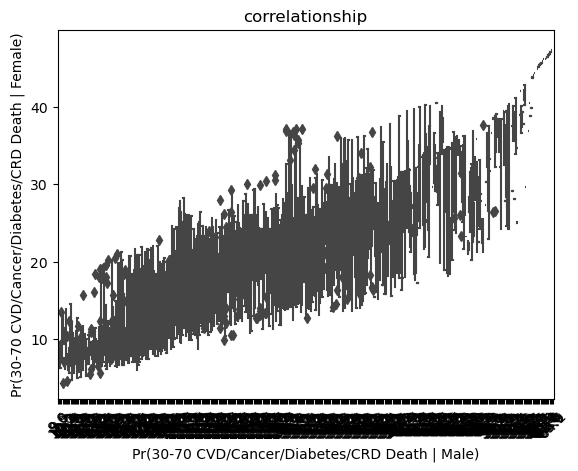

In [18]:
sns.boxplot(x='Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)', y='Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)', data=health)
plt.title("correlationship")
plt.xticks(rotation=45)
plt.show()

<h3>bar graph</h3>

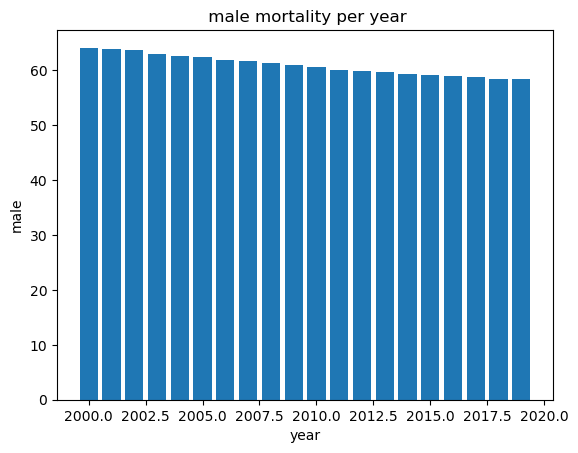

In [19]:
plt.bar(health["year"],health["Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Male)"])
plt.title(" male mortality per year")
plt.xlabel("year")
plt.ylabel("male")
plt.show()

<h3>female bar graph motality rate</h3>

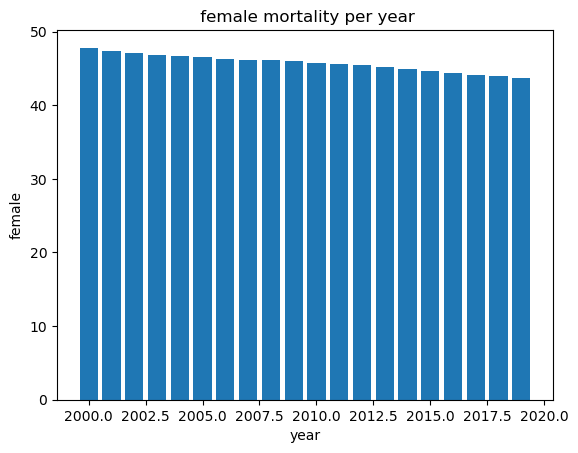

In [20]:
plt.bar(health["year"],health["Pr(30-70 CVD/Cancer/Diabetes/CRD Death | Female)"])
plt.title(" female mortality per year")
plt.xlabel("year")
plt.ylabel("female")
plt.show()

<h3>yearly Mortality</h3>

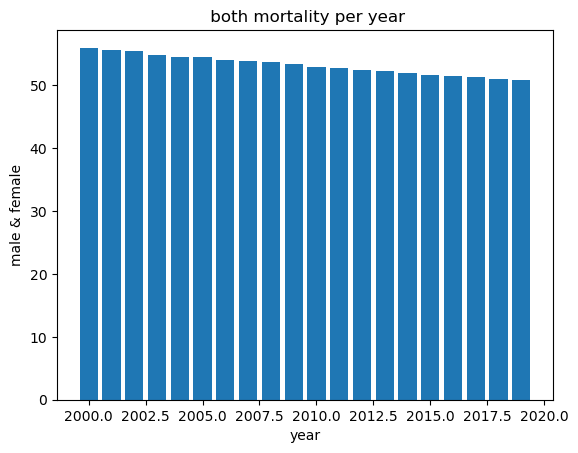

In [21]:
plt.bar(health["year"],health["Pr(30-70 NCD Mortality | All)"])
plt.title(" both mortality per year")
plt.xlabel("year")
plt.ylabel("male & female")
plt.show()

<h2><b>2.0 Mental health Depression disorder Data Analysis</b></h2>

In [22]:
health2=pd.read_csv("HEALTH/Mental health Depression disorder Data.csv",encoding="latin-1",low_memory=False,index_col=0)
health2.tail(100)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
108453,World,OWID_WRL,2002,210523437.941000,NaN,NaN,NaN,NaN,NaN,NaN
108454,World,OWID_WRL,2003,214411150.750000,NaN,NaN,NaN,NaN,NaN,NaN
108455,World,OWID_WRL,2004,218331898.579000,NaN,NaN,NaN,NaN,NaN,NaN
108456,World,OWID_WRL,2005,222225346.699000,NaN,NaN,NaN,NaN,NaN,NaN
108457,World,OWID_WRL,2006,225596848.087000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN


<h2>2.1. Checking the data types</h2>

In [23]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108553 entries, 0 to 108552
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Entity                     108553 non-null  object 
 1   Code                       103141 non-null  object 
 2   Year                       108553 non-null  object 
 3   Schizophrenia (%)          25875 non-null   object 
 4   Bipolar disorder (%)       19406 non-null   object 
 5   Eating disorders (%)       100236 non-null  object 
 6   Anxiety disorders (%)      6468 non-null    float64
 7   Drug use disorders (%)     6468 non-null    float64
 8   Depression (%)             6468 non-null    float64
 9   Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), object(6)
memory usage: 9.1+ MB


<h2>2.2Checking at the null values in the data set</h2>

In [24]:
health2.isna().idxmax()

Entity                          0
Code                          112
Year                            0
Schizophrenia (%)            6469
Bipolar disorder (%)         6469
Eating disorders (%)         7321
Anxiety disorders (%)        6468
Drug use disorders (%)       6468
Depression (%)               6468
Alcohol use disorders (%)    6468
dtype: int64

In [33]:
health2.dropna(inplace=True)

In [34]:
health2.isna().idxmax()

Entity                       0
Code                         0
Year                         0
Schizophrenia (%)            0
Bipolar disorder (%)         0
Eating disorders (%)         0
Anxiety disorders (%)        0
Drug use disorders (%)       0
Depression (%)               0
Alcohol use disorders (%)    0
dtype: int64

In [35]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     5488 non-null   object 
 1   Code                       5488 non-null   object 
 2   Year                       5488 non-null   object 
 3   Schizophrenia (%)          5488 non-null   object 
 4   Bipolar disorder (%)       5488 non-null   object 
 5   Eating disorders (%)       5488 non-null   object 
 6   Anxiety disorders (%)      5488 non-null   float64
 7   Drug use disorders (%)     5488 non-null   float64
 8   Depression (%)             5488 non-null   float64
 9   Alcohol use disorders (%)  5488 non-null   float64
dtypes: float64(4), object(6)
memory usage: 471.6+ KB


In [36]:
health2.shape

(5488, 10)

In [37]:
health2.tail()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269
6467,Zimbabwe,ZWE,2017,0.157963,0.611242,0.124443,3.110926,0.772648,3.192789,1.510943


<h2>Converting the string data sets to floats
</h2>

In [38]:
health2['Schizophrenia (%)'] = health2['Schizophrenia (%)'].astype(float)

In [39]:
health2['Bipolar disorder (%)'] = health2['Bipolar disorder (%)'].astype(float)

In [40]:
health2['Eating disorders (%)'] = health2['Eating disorders (%)'].astype(float)

In [41]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     5488 non-null   object 
 1   Code                       5488 non-null   object 
 2   Year                       5488 non-null   object 
 3   Schizophrenia (%)          5488 non-null   float64
 4   Bipolar disorder (%)       5488 non-null   float64
 5   Eating disorders (%)       5488 non-null   float64
 6   Anxiety disorders (%)      5488 non-null   float64
 7   Drug use disorders (%)     5488 non-null   float64
 8   Depression (%)             5488 non-null   float64
 9   Alcohol use disorders (%)  5488 non-null   float64
dtypes: float64(7), object(3)
memory usage: 471.6+ KB


In [42]:
health2.describe()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000
mean,0.208183,0.716884,0.234023,3.946979,0.833328,3.474504,1.562273
std,0.041998,0.164246,0.154147,1.134810,0.441199,0.671741,0.861973
min,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940
25%,0.179452,0.615732,0.121761,3.178912,0.524018,2.955355,0.961545
50%,0.198510,0.693954,0.180378,3.515140,0.709090,3.461421,1.466906
75%,0.230553,0.830217,0.278681,4.659540,0.906843,3.877343,1.853683
max,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668


<h2>Visualization</h2>

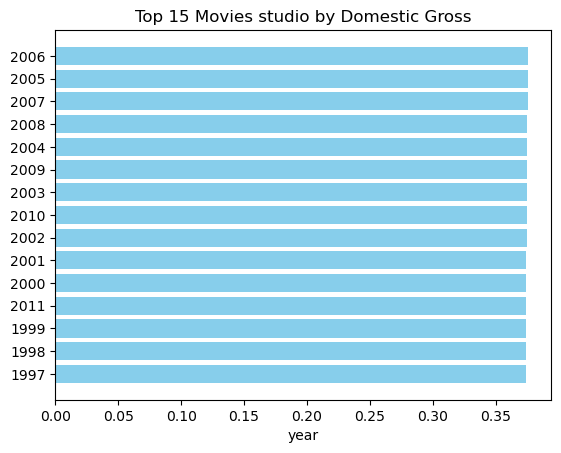

In [43]:
top_Schizophrenia=health2.sort_values(by='Schizophrenia (%)', ascending=False).head(15)

# Plot
#plt.figure(figsize=(10, 8))
plt.barh(top_Schizophrenia["Year"], top_Schizophrenia['Schizophrenia (%)'], color='skyblue')
plt.xlabel("year")
plt.title('Top 15 Movies studio by Domestic Gross')
plt.gca().invert_yaxis()  # Highest grossing at the top

plt.show()